In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [74]:
sales = pd.read_csv('final_data.csv')
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Day,Year,Time
0,73891,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",1,1,19,3:07
1,74701,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",1,1,19,3:40
2,76054,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",1,1,19,4:56
3,76708,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",1,1,19,5:53
4,76061,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",1,1,19,6:03


In [75]:
sales.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                 int64
Day                   int64
Year                  int64
Time                 object
dtype: object

In [76]:
sales.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Purchase Address    0
Month               0
Day                 0
Year                0
Time                0
dtype: int64

In [77]:
sales['Price Each'] = pd.to_numeric(sales['Price Each'])
yearly_sales = sales.groupby('Year')['Price Each'].sum()
yearly_sales


Year
19    34254139.07
20        8503.40
Name: Price Each, dtype: float64

In [78]:
best_year = yearly_sales.idxmax()
earnings = sales.loc[sales['Year'] == best_year, 'Price Each'].sum()
print("Best Year for Sales:", best_year)
print("Total Earnings:", earnings)


Best Year for Sales: 19
Total Earnings: 34254139.07


In [79]:
monthly_sales = sales.groupby('Month')['Price Each'].sum()
best_month = monthly_sales.idxmax()
earnings = monthly_sales.loc[best_month]

print("Best Month for Sales:", best_month)
print("Total Earnings:", earnings)

Best Month for Sales: 12
Total Earnings: 4583267.77


In [80]:

sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
address = sales.groupby('Purchase Address')['Quantity Ordered'].sum()
best_address = address.idxmax()
total_sales = address.loc[best_address]

print("Address with the Highest Sales:",best_address )
print("Total Sales in that City:", total_sales)

Address with the Highest Sales: 338 Hickory St, Los Angeles, CA 90001
Total Sales in that City: 12


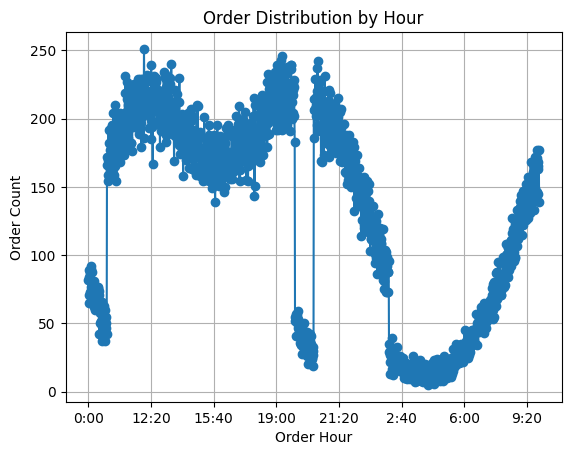

Best Hour for Advertising: 11:58


In [81]:
order_counts = sales.groupby('Time').size()

# Plot the distribution of orders over different hours
order_counts.plot(kind='line', marker='o')
plt.xlabel('Order Hour')
plt.ylabel('Order Count')
plt.title('Order Distribution by Hour')
plt.grid(True)
plt.show()

# Find the hour with the highest order count
best_hour = order_counts.idxmax()

print("Best Hour for Advertising:", best_hour)

('Lightning Charging Cable', 'iPhone') 509
('USB-C Charging Cable', 'Google Phone') 504
('iPhone', 'Lightning Charging Cable') 502
('Google Phone', 'USB-C Charging Cable') 493
('iPhone', 'Wired Headphones') 247


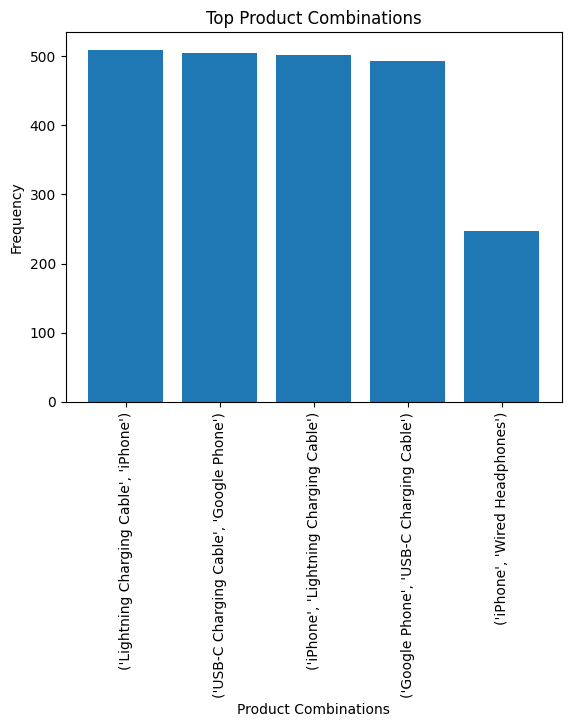

In [82]:
from itertools import combinations
from collections import Counter

# Group the data by order ID and create a list of products in each order
order_products = sales.groupby('Order ID')['Product'].apply(list)

# Count the occurrences of product combinations
product_combinations = []
for products in order_products:
    product_combinations.extend(list(combinations(products, 2)))  # Change '2' to the desired combination size

# Calculate the frequency of product combinations
combination_counts = Counter(product_combinations)

# Get the most frequently occurring combinations
top_combinations = combination_counts.most_common(5)  # Change '5' to the desired number of top combinations

for combination, count in top_combinations:
    print(combination, count)
    
# Extract combination and count data for plotting
combinations, counts = zip(*top_combinations)

# Convert combinations to strings
combinations = [str(combination) for combination in combinations]

# Plot the data
plt.bar(combinations, counts)
plt.xlabel('Product Combinations')
plt.ylabel('Frequency')
plt.title('Top Product Combinations')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [83]:

# Group the data by product name and calculate the sum of quantity ordered
product_sales = sales.groupby('Product')['Quantity Ordered'].sum()

# Find the product with the highest sales
best_selling_product = product_sales.idxmax()

# Get the sales volume of the best-selling product
sales_volume = product_sales.loc[best_selling_product]

print("Best-selling Product:", best_selling_product)
print("Sales Volume:", sales_volume)

# Analyze possible reasons for its high sales
# You can add your own analysis here based on the context of your data and business
print("\nPossible Reasons for High Sales:")
print("Product popularity, brand recognition,")
print("High-quality product or positive customer reviews,")
print("Strong customer demand or trendiness of the product")
# Some possible factors to consider:
# - Effective marketing and advertising campaigns
# - Competitive pricing or discounts

Best-selling Product: AAA Batteries (4-pack)
Sales Volume: 30986

Possible Reasons for High Sales:
Product popularity, brand recognition,
High-quality product or positive customer reviews,
Strong customer demand or trendiness of the product


In [84]:
# Count the occurrences of USB-C Charging Cable
usb_c_orders = sales[sales['Product'] == 'USB-C Charging Cable'].shape[0]

# Calculate the total number of orders
total_orders = sales.shape[0]

# Calculate the probability of ordering USB-C Charging Cable
usb_c_probability = ((usb_c_orders / total_orders)*100)

print("Probability of Ordering USB-C Charging Cable:", usb_c_probability,"%")

Probability of Ordering USB-C Charging Cable: 11.772023739000248 %


In [85]:
iphone_orders = sales[sales['Product'] == 'iPhone'].shape[0]
total_orders = sales.shape[0]
iPhone_probability = ((iphone_orders / total_orders)*100)

print("Probability of Ordering iPhone:", iPhone_probability,"%")

Probability of Ordering iPhone: 3.6836379694753507 %


In [86]:
google_phone_orders = sales[sales['Product'] == 'Google Phone'].shape[0]
total_orders = sales.shape[0]
google_phone_orders_probability = ((google_phone_orders / total_orders)*100)

print("Probability of Ordering Google Phone:", google_phone_orders_probability,"%")

Probability of Ordering Google Phone: 2.9738375537197204 %


In [87]:
wired_headphones_orders = sales[sales['Product'] == 'Wired Headphones'].shape[0]
total_orders = sales.shape[0]
wired_headphones_probability = ((wired_headphones_orders / total_orders)*100)

print("Probability of Ordering Google Phone:", wired_headphones_probability,)

Probability of Ordering Google Phone: 10.151007615005977


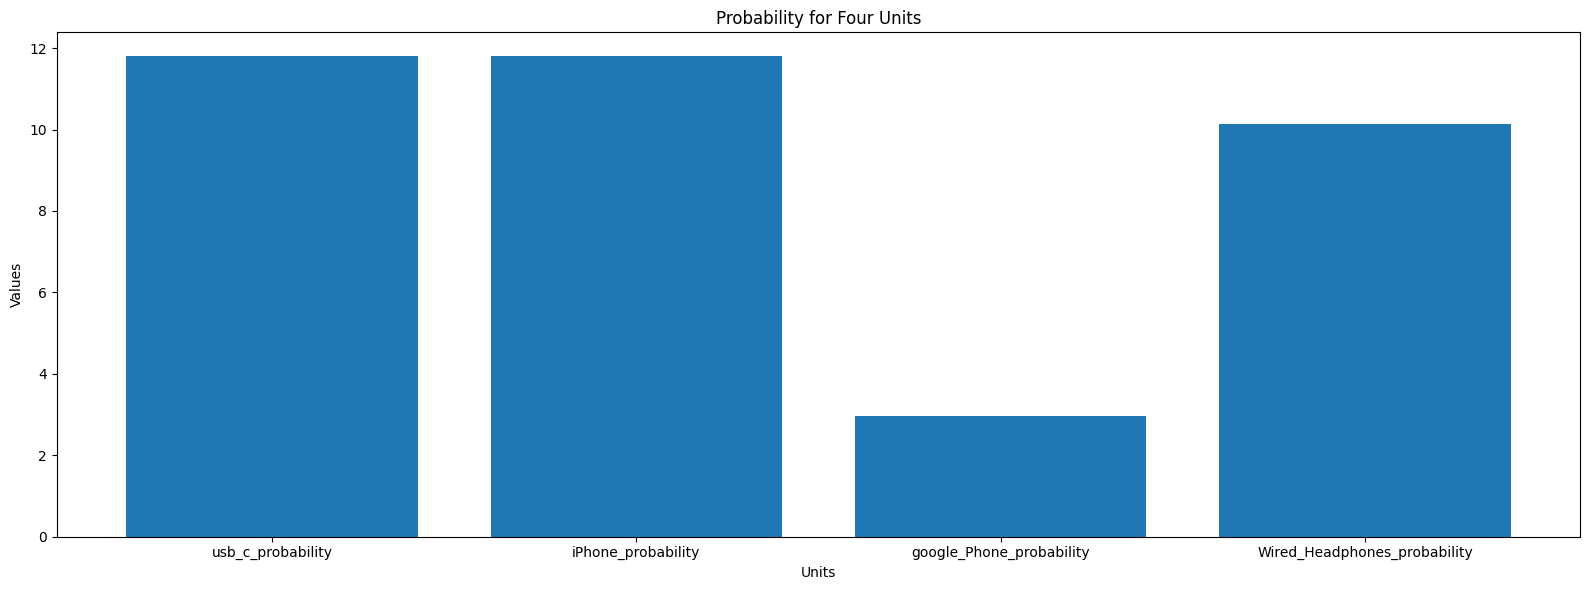

In [88]:
# Data for the four units
units = ['usb_c_probability', 'iPhone_probability', 'google_Phone_probability', 'Wired_Headphones_probability']
values = [11.80, 11.80, 2.97, 10.14]

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(units, values)

# Add labels and title
ax.set_xlabel('Units')
ax.set_ylabel('Values')
ax.set_title('Probability for Four Units')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()